In [1]:
import pandas as pd
from automlbench import load_data, preprocess_data, get_models, evaluate_model, plot_performance

# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)


In [2]:
# Drop irrelevant columns
titanic_df = titanic_df.drop(columns=["Name", "Ticket", "Cabin"])  # These are non-numeric identifiers

# Define target column
target_column = "Survived"

# Preprocess dataset
X_train, X_test, y_train, y_test = preprocess_data(titanic_df, target_column)


In [3]:
# Get models
models = get_models()

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test)

# Print results
for model_name, scores in results.items():
    print(f"{model_name}: {scores}")


/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [01:42:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

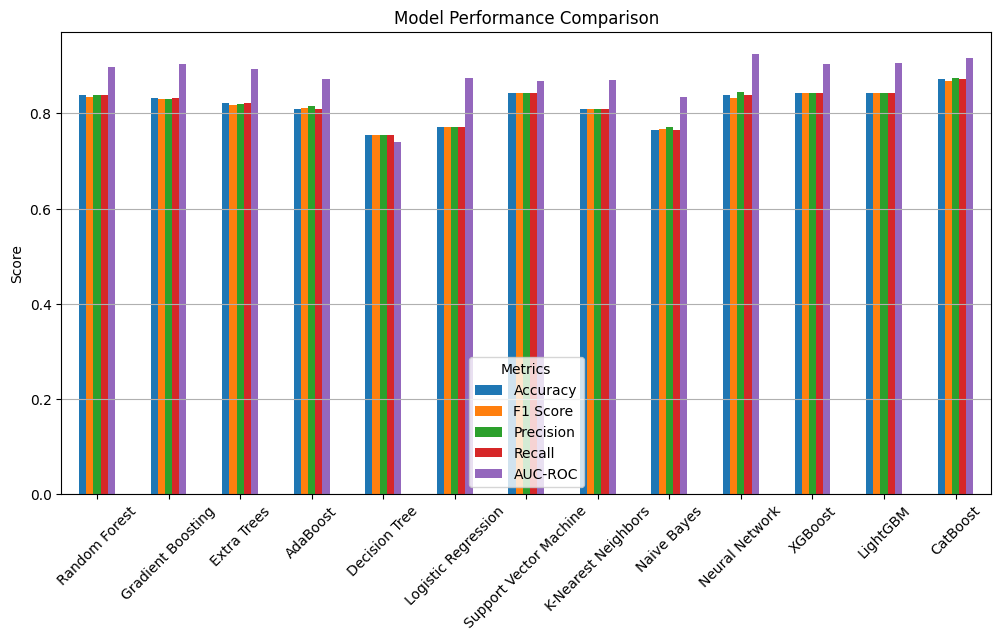

In [4]:
# Plot performance for selected metrics
plot_performance(results, metrics=["Accuracy", "F1 Score","Precision",'Recall','AUC-ROC'])


In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=";")
df.to_csv("wine.csv", index=False)


In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
target_column = "quality"

In [8]:
# Step 3: Preprocess Data
X_train, X_test, y_train, y_test = preprocess_data(df, target_column)

# Step 4: Train & Evaluate Models
models = get_models()
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test)


/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [01:42:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] Start training from score -5.074392
[LightGBM] [Info] Start training from score -3.416164
[LightGBM] [Info] Start training from score -0.854885
[LightGBM] [Info] Start training from score -0.917464
[LightGBM] [Info] Start training from score -2.084930
[LightGBM] [Info] Start training from score -4.445784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [9]:
# Get models
models = get_models()

# Train & evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test)

# Print results
for model_name, scores in results.items():
    print(f"{model_name}: {scores}")


/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [01:42:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1016
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] Start training from score -5.074392
[LightGBM] [Info] Start training from score -3.416164
[LightGBM] [Info] Start training from score -0.854885
[LightGBM] [Info] Start training from score -0.917464
[LightGBM] [Info] Start training from score -2.084930
[LightGBM] [Info] Start training from score -4.445784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

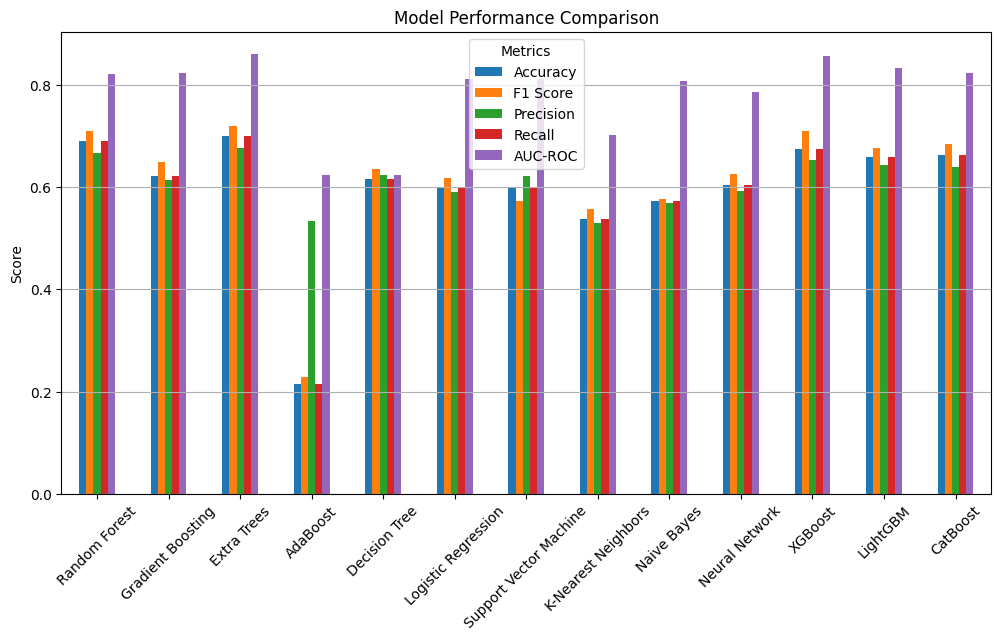

In [10]:
# Plot performance for selected metrics
plot_performance(results, metrics=["Accuracy", "F1 Score","Precision",'Recall','AUC-ROC'])


In [11]:
import pandas as pd

# Load Adult Income Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"]
df = pd.read_csv(url, names=columns, skipinitialspace=True)

# Save dataset locally
df.to_csv("adult_income.csv", index=False)


In [12]:
from automlbench import load_data, preprocess_data, get_models, evaluate_model, plot_performance

# Load dataset
dataset_path = "adult_income.csv"
df = load_data(dataset_path)

# Define target column (income: ">50K" or "<=50K")
target_column = "income"

In [13]:
# Preprocess data
X_train, X_test, y_train, y_test = preprocess_data(df, target_column)

In [14]:
# Train models and evaluate performance
models = get_models()
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test)

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [01:47:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 6272, number of negative: 19776
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 26048, number of used features: 94
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240786 -> initscore=-1.148374
[LightGBM] [Info] Start training from score -1.148374


Random Forest: {'Accuracy': 0.855980346998311, 'Precision': 0.8506301243701087, 'Recall': 0.855980346998311, 'F1 Score': 0.8519218447768506, 'AUC-ROC': 0.9021147753500777}
Gradient Boosting: {'Accuracy': 0.8673422385997236, 'Precision': 0.8625024361538408, 'Recall': 0.8673422385997236, 'F1 Score': 0.8600142438182219, 'AUC-ROC': 0.9215240650673135}
Extra Trees: {'Accuracy': 0.8320282511899278, 'Precision': 0.8266876626116165, 'Recall': 0.8320282511899278, 'F1 Score': 0.8286806403622891, 'AUC-ROC': 0.878281430156697}
AdaBoost: {'Accuracy': 0.8628896054045755, 'Precision': 0.8572817275153447, 'Recall': 0.8628896054045755, 'F1 Score': 0.8559592418102092, 'AUC-ROC': 0.916569530300874}
Decision Tree: {'Accuracy': 0.8186703516044833, 'Precision': 0.8167955469058655, 'Recall': 0.8186703516044833, 'F1 Score': 0.8176792333904502, 'AUC-ROC': 0.7467741960434882}
Logistic Regression: {'Accuracy': 0.8533701827115001, 'Precision': 0.8470412885062439, 'Recall': 0.8533701827115001, 'F1 Score': 0.847886

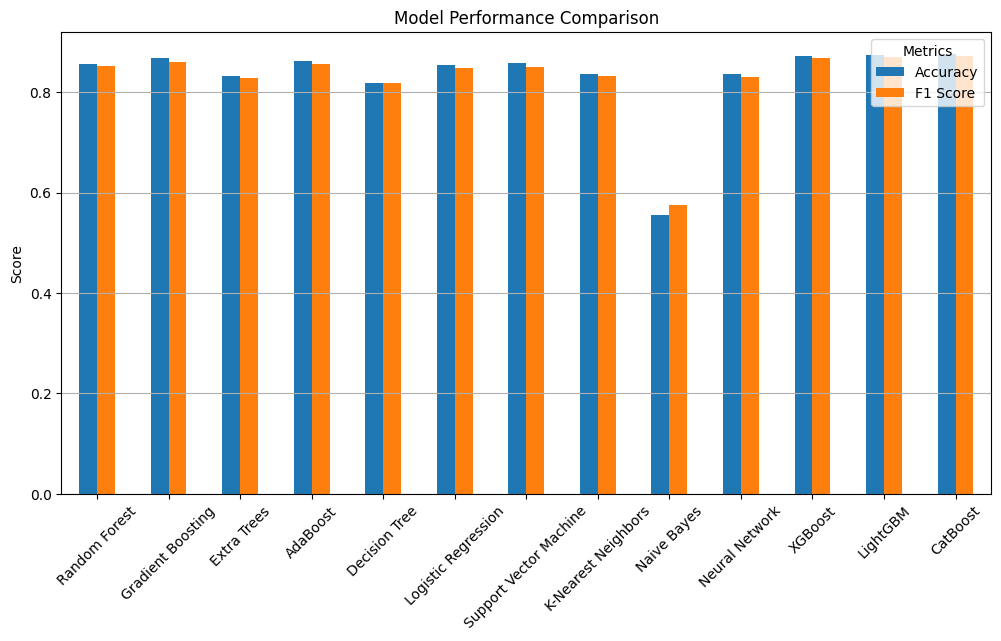

In [15]:
# Print results
for model_name, scores in results.items():
    print(f"{model_name}: {scores}")

# Plot performance comparison
plot_performance(results, metrics=["Accuracy", "F1 Score"])

In [16]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load Diabetes Dataset
data = load_diabetes(as_frame=True)
df = data.frame
df["target"] = (df["target"] > df["target"].median()).astype(int)  # Convert target to binary classification

# Save dataset locally
df.to_csv("diabetes.csv", index=False)


In [20]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0


In [17]:
from automlbench import load_data, preprocess_data, get_models, evaluate_model, plot_performance

# Load dataset
dataset_path = "diabetes.csv"
df = load_data(dataset_path)

# Define target column
target_column = "target"

In [18]:
# Preprocess data
X_train, X_test, y_train, y_test = preprocess_data(df, target_column)

# Train models and evaluate performance
models = get_models()
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test)

# Print results
for model_name, scores in results.items():
    print(f"{model_name}: {scores}")

/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [01:48:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 176, number of negative: 177
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 353, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498584 -> initscore=-0.005666
[LightGBM] [Info] Start training from score -0.005666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

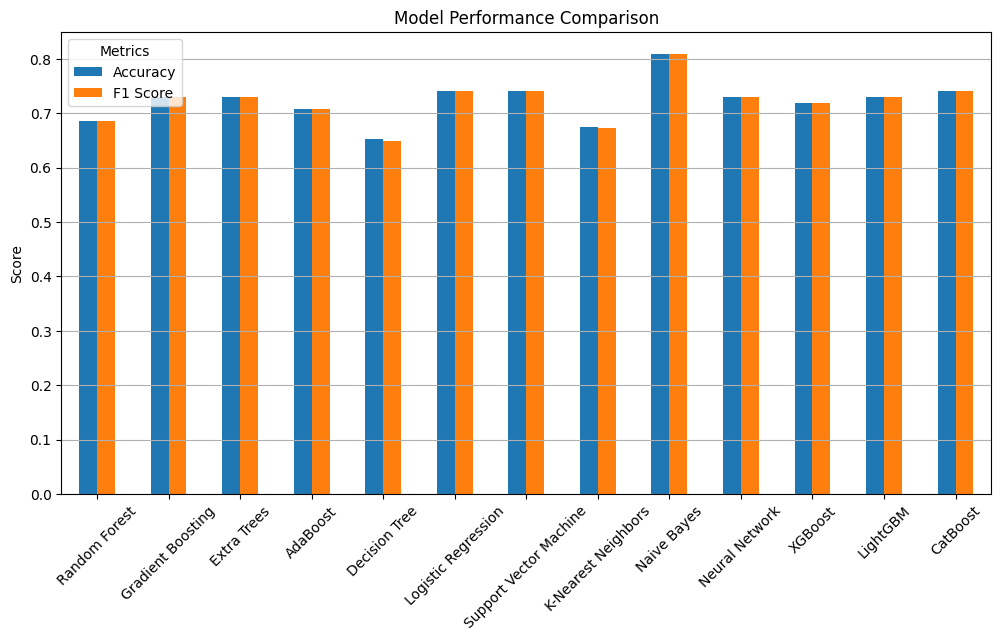

In [19]:
# Plot performance comparison
plot_performance(results, metrics=["Accuracy", "F1 Score"])

In [21]:
import pandas as pd

# Load Heart Disease Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=columns)

# Convert missing values in "ca" and "thal" to NaN (UCI dataset uses '?' for missing values)
df.replace("?", pd.NA, inplace=True)

# Save dataset locally
df.to_csv("heart_disease.csv", index=False)


/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/magus/.pyenv/versions/3.8.7/envs/magus/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [01:50:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 243
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] Start training from score -0.613740
[LightGBM] [Info] Start training from score -1.704748
[LightGBM] [Info] Start training from score -2.121642
[LightGBM] [Info] Start training from score -2.156733
[LightGBM] [Info] Start training from score -3.186353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

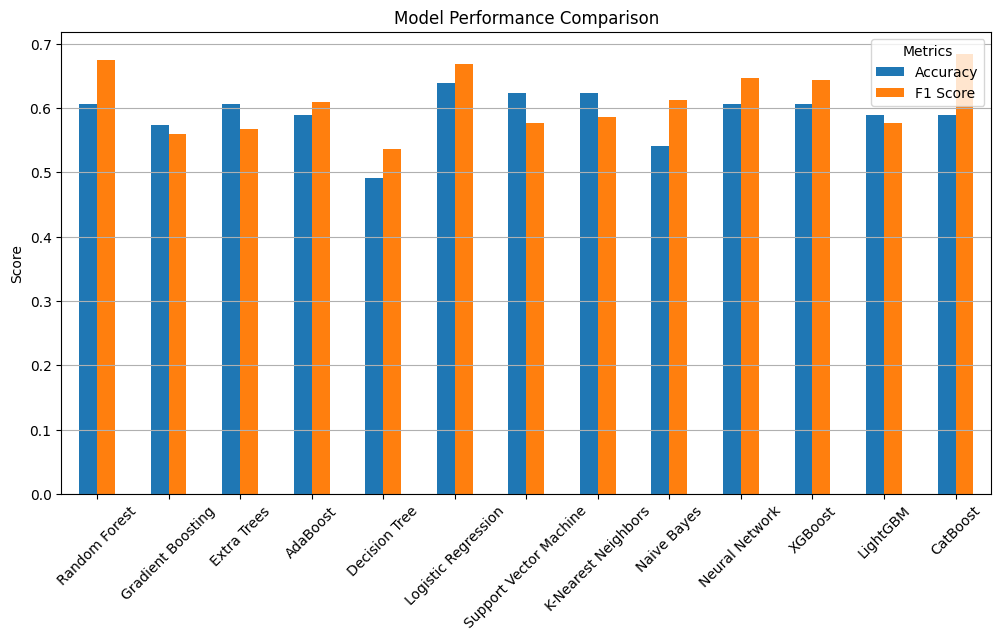

In [22]:
from automlbench import load_data, preprocess_data, get_models, evaluate_model, plot_performance

# Load dataset
dataset_path = "heart_disease.csv"
df = load_data(dataset_path)

# Define target column
target_column = "target"

# Preprocess data
X_train, X_test, y_train, y_test = preprocess_data(df, target_column)

# Train models and evaluate performance
models = get_models()
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test)

# Print results
for model_name, scores in results.items():
    print(f"{model_name}: {scores}")

# Plot performance comparison
plot_performance(results, metrics=["Accuracy", "F1 Score"])
